In [1]:
%load_ext autoreload
%autoreload 2

# Local Test for development server

Local test for development server expose at `http://0.0.0.0:8080`, there are two path routes:

- `/ping` this needs to be call first to get the Health check of the server.
- `/invocations` Invocation endpoint to get detected objects.

Just run the script in `scripts` directory and run `run_local.sh`

# Import utilities

These utilities make it easy to test the server and plot the results.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
from io import BytesIO
from base64 import b64decode
from PIL import Image

from utils import (InferenceServerClient,
                   visualize_bounding_boxes,
                   visualize_crop_images)

## Load request body payload

In [3]:
body_payload = json.load(open("test_request_data/3.json", "r")) # this contains {"base64_image": "..."}

## Visualize our Image

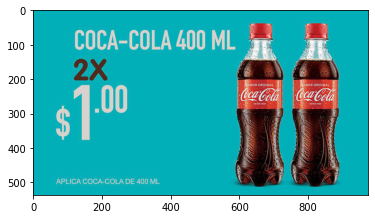

In [4]:
b64_decode_image = b64decode(body_payload["base64_image"].split(",")[-1])
image = np.array(Image.open(BytesIO(b64_decode_image)))
plt.imshow(image)
plt.show()

## Instanciate the client

In [5]:
client = InferenceServerClient(host = "http://0.0.0.0:8080")

## Ping the server

Now models are good to predict

In [12]:
print(json.dumps(client.ping(), indent=3, ensure_ascii=False))

Request took: 868.64 ms
{
   "message": "health check passed: all models where already loaded.",
   "models_info": {
      "YoloV5Predictor_loading_Status": true,
      "ClassifierPredictor_loading_status": true
   }
}


## Make invocations

In [18]:
detections = client.invocations(body=body_payload)
print(json.dumps(detections, indent=3, ensure_ascii=False))

Request took: 146.15 ms
{
   "total_classes": 6,
   "detected_products": [
      {
         "product_id": 30981,
         "product_name": "CocaCola x 400 ml",
         "detection_index": 4,
         "confidence": 0.9883037805557251,
         "bounding_box": [
            587,
            33,
            740,
            500
         ]
      },
      {
         "product_id": 30981,
         "product_name": "CocaCola x 400 ml",
         "detection_index": 4,
         "confidence": 0.9985523819923401,
         "bounding_box": [
            748,
            27,
            892,
            514
         ]
      }
   ]
}


## Visualize responses

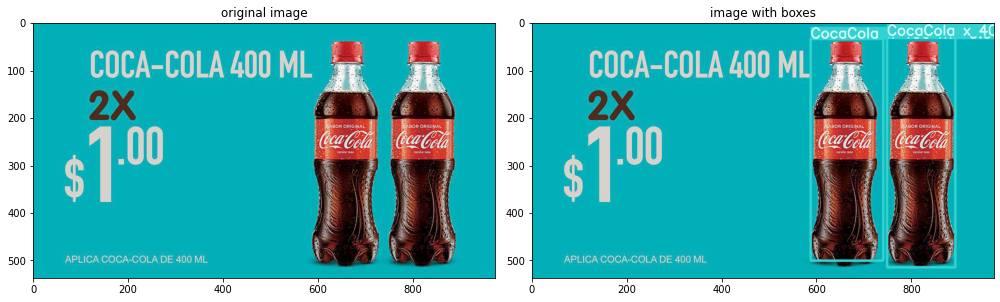

In [88]:
visualize_bounding_boxes(image, detections, figsize=(14, 5))

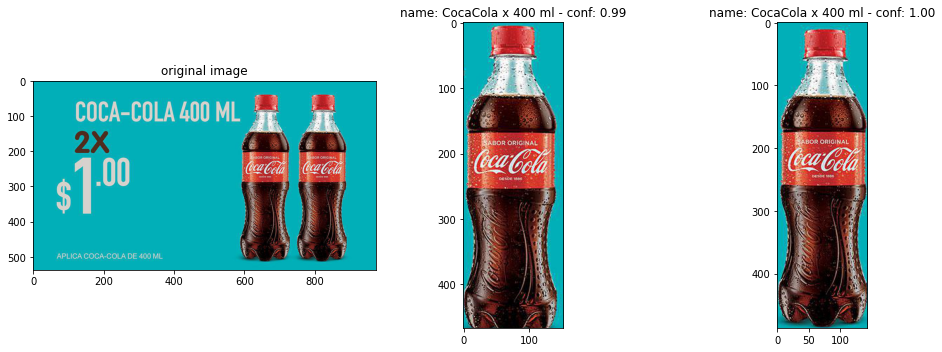

In [89]:
visualize_crop_images(image, detections, figsize=(14, 5))